In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier

In [116]:
df=pd.read_csv('Diabetes.csv')

In [117]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [118]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [121]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [122]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [123]:
# prepare the data
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [125]:
rms=RandomOverSampler(random_state=41)
x_res,y_res=rms.fit_resample(x,y)

In [126]:
# Logistic Regression #SVC #Random Forest Classifier #Gradient Boosting Classifier

In [127]:
lo=LogisticRegression()
s=SVC()
rm=RandomForestClassifier(class_weight='balanced',n_estimators=100)
gb=GradientBoostingClassifier(n_estimators=1000)
clf = DecisionTreeClassifier(random_state=42)

In [128]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifier']
r1=[]
r2=[]
r3=[]

In [129]:
def cal(model):
    print(model)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    acc=accuracy_score(pre,y_test)
    rs=recall_score(pre,y_test)
    f=f1_score(pre,y_test)
    r1.append(acc)
    r2.append(rs)
    r3.append(f)
    cm=confusion_matrix(pre,y_test)
    print('Accuracy_score is : ',acc,'\nRecall_score is :',rs,'\nf1_score is ',f,'\nConfusion_matrix is : ',cm)
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)

LogisticRegression()
Accuracy_score is :  0.6948051948051948 
Recall_score is : 0.725 
f1_score is  0.5523809523809524 
Confusion_matrix is :  [[78 36]
 [11 29]]


C:\Users\rakes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


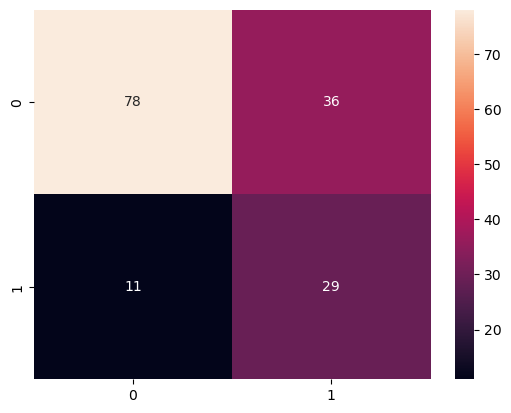

In [130]:
cal(lo)

SVC()
Accuracy_score is :  0.6948051948051948 
Recall_score is : 0.75 
f1_score is  0.5346534653465346 
Confusion_matrix is :  [[80 38]
 [ 9 27]]


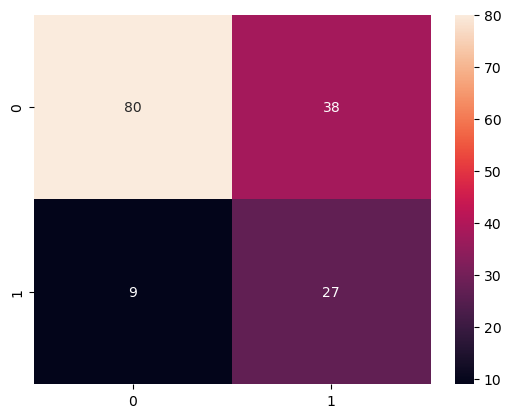

In [131]:
cal(s)

RandomForestClassifier(class_weight='balanced')
Accuracy_score is :  0.6948051948051948 
Recall_score is : 0.6875 
f1_score is  0.584070796460177 
Confusion_matrix is :  [[74 32]
 [15 33]]


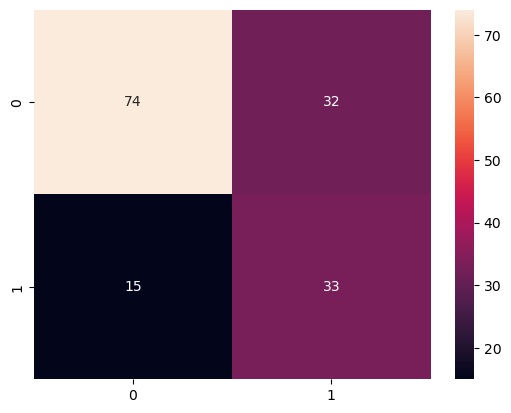

In [132]:
cal(rm)

GradientBoostingClassifier(n_estimators=1000)
Accuracy_score is :  0.7272727272727273 
Recall_score is : 0.7254901960784313 
f1_score is  0.6379310344827587 
Confusion_matrix is :  [[75 28]
 [14 37]]


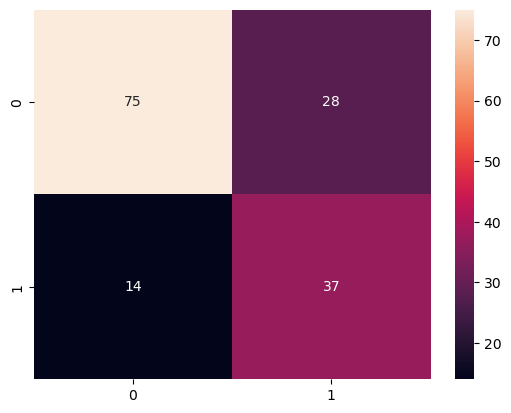

In [133]:
cal(gb)

DecisionTreeClassifier(random_state=42)
Accuracy_score is :  0.6753246753246753 
Recall_score is : 0.6595744680851063 
f1_score is  0.5535714285714286 
Confusion_matrix is :  [[73 34]
 [16 31]]


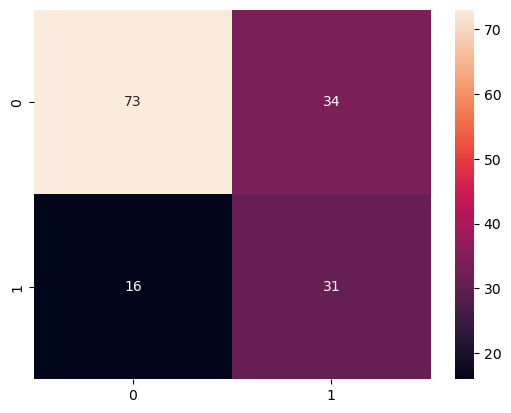

In [134]:
cal(clf)

In [135]:
r1

[0.6948051948051948,
 0.6948051948051948,
 0.6948051948051948,
 0.7272727272727273,
 0.6753246753246753]

In [136]:
r2

[0.725, 0.75, 0.6875, 0.7254901960784313, 0.6595744680851063]

In [137]:
r3

[0.5523809523809524,
 0.5346534653465346,
 0.584070796460177,
 0.6379310344827587,
 0.5535714285714286]

In [138]:
res=pd.DataFrame({'Algrithm':columns,'Accuracies':r1,'Recall':r2,'FScore':r3})

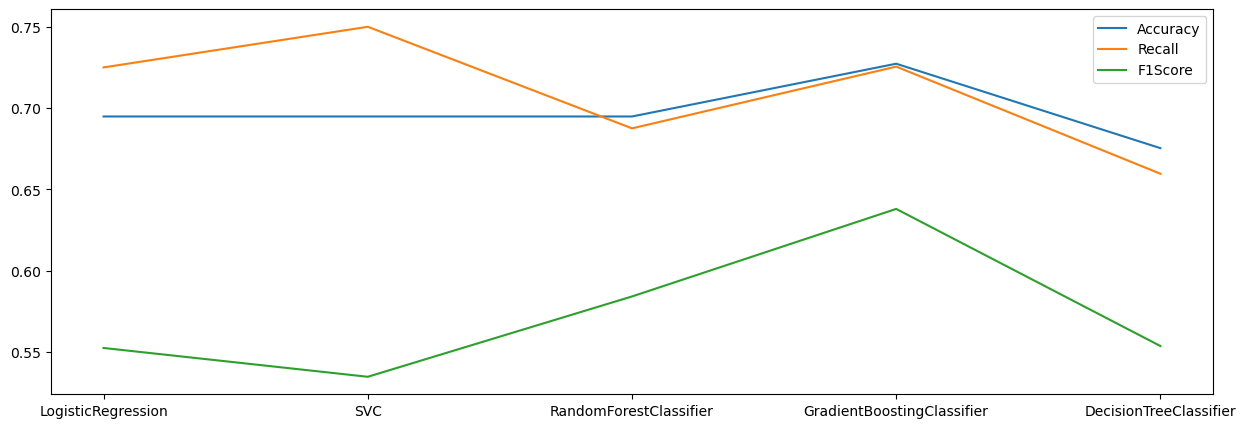

In [139]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(res.Algrithm,r1, label='Accuracy')
plt.plot(res.Algrithm,r2, label='Recall')
plt.plot(res.Algrithm,r3, label='F1Score')
plt.legend()
plt.show()